In [6]:
%%capture
! pip install nashpy

In [177]:
import nashpy as nash
import numpy as np
from scipy.stats import poisson
import seaborn
import matplotlib.pyplot as plt

In [272]:
def attacker_payoff(rate, treshold):
  C=1000
  beta=1.25
  gamma=0.0002
  omega=0.02

  return (rate * treshold)/(C*700)-omega-gamma  

In [259]:
def Game(strategies_A, strategies_B):
  
  n= strategies_A.shape[0]
  m= strategies_B.shape[0]
  payoffs_attacker= np.zeros((n, n))
  payoffs_defendant= np.zeros((m, m))

  for i in range(n):
    for j in range(m):
      payoffs_attacker[i][j], payoffs_defendant[i][j] = attacker_payoff(strategies_A[i], strategies_B[j]) , -1* attacker_payoff(strategies_A[i], strategies_B[j])

  return nash.Game(payoffs_attacker, payoffs_defendant), payoffs_attacker, payoffs_defendant

In [260]:
%%time

n=10

rates=np.random.randint(60, 700, size=(n, 1))
thresholds=np.random.randint(60, 700, size=(n, 1))


game, payoffs_attacker, payoffs_defendant = Game(rates, thresholds)

eqs = game.support_enumeration()
equilibria = []
for elm in eqs:
  equilibria += [elm]
list(equilibria)

CPU times: user 3min 4s, sys: 802 ms, total: 3min 4s
Wall time: 3min 5s


[(array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))]

In [261]:
print(f'Equilibria of (A): {rates[list(equilibria[0][0]).index(max(equilibria[0][0]))][0]}, \nEquilibria of (D): {thresholds[list(equilibria[0][1]).index(max(equilibria[0][1]))][0]}')

Equilibria of (A): 693, 
Equilibria of (D): 77


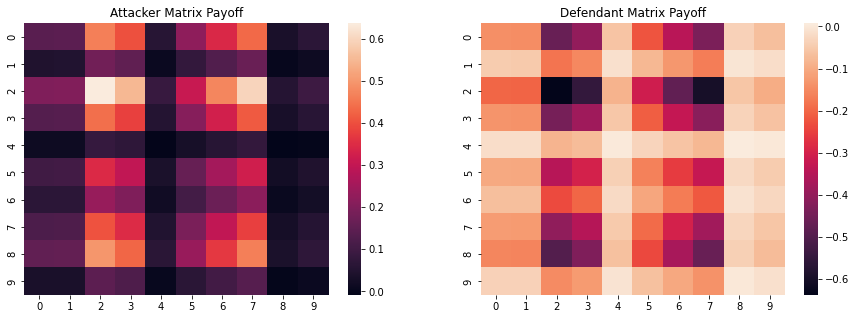

In [262]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.set_title("Attacker Matrix Payoff")
ax2.set_title("Defendant Matrix Payoff")

seaborn.heatmap(payoffs_attacker, ax=ax1)
seaborn.heatmap(payoffs_defendant, ax=ax2)

plt.show()

#Static Simultaneuous Game with different payoffs functions

In [292]:
def defendant_payoff(rate, threshold):
  C=1000
  beta=1.25
  gamma=0.0002
  omega=0.02

  return 1 - threshold * rate/(C*C)

In [293]:
def Game_2(strategies_A, strategies_B):
  
  n= strategies_A.shape[0]
  m= strategies_B.shape[0]
  payoffs_attacker= np.zeros((n, n))
  payoffs_defendant= np.zeros((m, m))

  for i in range(n):
    for j in range(m):
      payoffs_attacker[i][j]  = attacker_payoff(strategies_A[i], strategies_B[j])
      payoffs_defendant[i][j] = defendant_payoff(strategies_A[i], strategies_B[j])

  return nash.Game(payoffs_attacker, payoffs_defendant), payoffs_attacker, payoffs_defendant

In [297]:
%%time

n=8

rates=np.random.randint(60, 700, size=(n, 1))
thresholds=np.random.randint(60, 700, size=(n, 1))


game_2, payoffs_attacker, payoffs_defendant = Game_2(rates, thresholds)

eqs = game_2.support_enumeration()
equilibria = []
for elm in eqs:
  equilibria += [elm]
list(equilibria)

CPU times: user 10.2 s, sys: 57.5 ms, total: 10.2 s
Wall time: 10.3 s


[(array([0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0.]))]